In [1]:
from Annotation_helper import *

Sets correct values for generated figures:

In [2]:
import seaborn as sns
sns.set()

SMALL_SIZE = 15
MEDIUM_SIZE = 17
BIGGER_SIZE = 19

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Set paths to files

In [3]:
data_folder = "../../Data"
structured_data_folder = data_folder + "/structured_data"
text_path = data_folder + "/text"
data_path = structured_data_folder + "/test.csv"
dist_folder = structured_data_folder + "/Distances"
figure_folder = "../Figures/Results/Embeddings"
model_folder = "../Models/Embeddings"
matches = pd.read_csv(structured_data_folder + "/Matches/Bas.csv", index_col=0)
figure_folder = "../Figures/Results/Classic"

In [4]:
transactions = load_transactions("../../Data/structured_data\VOC Cochin Slave Transactions 1706-1801 - IISH - Database - 2018 - v1.csv")
permissions = load_permissions("../../Data/structured_data\VOC Cochin Slave Transport Permissions 1770-1795 - IISH - Database - 2018 - v1.csv")

E:\UvA\Scriptie\Thesis_code\Annotation\Annotation_helper.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
  col = col.str.replace('[^a-zA-Z ]', '')


In [5]:
distances = pd.read_csv(dist_folder + "/distances_0.csv", dtype={'permission_indx': 'uint16', 'transaction_indx': 'uint16', 'SlaafGender': 'bool', 'SlaafNaamNieuw': 'float16', 'BezitterGender': 'bool', 'BezitterVoornaam': 'float16', 'BezitterBeroep': 'float16', 'BezitterAchternaam': 'float16'})
for i in range(1, 99):
    df2 = pd.read_csv(f"{dist_folder}/distances_{i}.csv", dtype={'permission_indx': 'uint16', 'transaction_indx': 'uint16', 'SlaafGender': 'bool', 'SlaafNaamNieuw': 'float16', 'BezitterGender': 'bool', 'BezitterVoornaam': 'float16', 'BezitterBeroep': 'float16', 'BezitterAchternaam': 'float16'})
    distances = pd.concat([distances, df2])
distances.reset_index(inplace=True)

In [6]:
distances

,index,permission_indx,transaction_indx,SlaafGender,SlaafNaamNieuw,BezitterGender,BezitterVoornaam,BezitterTussen,BezitterAchternaam,BezitterBeroep,BezitterStatus,BezitterEtniciteit
0,0,0,0,True,0.000000,False,0.000000,0.0,0.000000,0.0,0.0,0.0
1,1,0,1,True,0.250000,False,0.000000,0.0,0.000000,0.0,0.0,0.0
2,2,0,2,False,0.166626,False,0.000000,0.0,0.000000,0.0,0.0,0.0
3,3,0,3,True,0.111084,False,0.000000,0.0,0.000000,0.0,0.0,0.0
4,4,0,4,True,0.142822,False,0.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27314395,273139,3888,7192,True,0.142822,True,0.166626,0.0,0.166626,0.0,0.0,1.0
27314396,273140,3888,7193,False,0.142822,True,0.166626,0.0,0.166626,0.0,0.0,1.0
27314397,273141,3888,7194,False,0.000000,True,0.277832,0.0,0.166626,0.0,0.0,1.0
27314398,273142,3888,7195,False,0.111084,True,0.277832,0.0,0.166626,0.0,0.0,1.0


In [7]:
matches[matches["transaction_indx"] != 'None']

,Annotator,transaction_indx,permission_indx
30,Bas,4475,31
31,Bas,4097,32
32,Bas,4242,33
37,Bas,4220,38
39,Bas,4202,40
...,...,...,...
596,Bas,4433,559
644,Bas,4359,607
688,Bas,5922,651
704,Bas,6066,667


In [8]:
def count_missing_matches(distances, matches):
    count = 0
    real_matches = matches[matches["transaction_indx"] != 'None']
    for i, match in real_matches.iterrows():
        res = distances.query(f"transaction_indx == {match['transaction_indx']} & permission_indx == {match['permission_indx']}").index
        if len(res) == 0:
            count += 1
    return count
count_missing_matches(distances[distances["SlaafNaamNieuw"] > 0.2], matches)

0

In [9]:
def test_thresholds(distances, matches, column):
    n_matches = matches[matches["transaction_indx"] != 'None'].shape[0]


    data_size = [1]
    n_missing_matches = [0]
    x = [0]
    for i in range(1,10):
        filtered = distances[distances[column] >= i/10]
        n_missing_matches.append(count_missing_matches(filtered, matches)/n_matches)
        x.append(i/10)

        data_size.append(filtered.shape[0]/distances.shape[0])
    return (data_size, n_missing_matches, x)

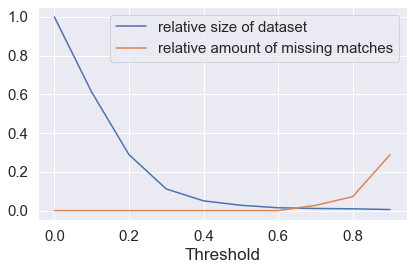

In [11]:
blocking_col = 'SlaafNaamNieuw'
data_size, n_missing_matches, x = test_thresholds(distances, matches, blocking_col)
plt.plot(x, data_size, label='relative size of dataset')
plt.plot(x, n_missing_matches, label='relative amount of missing matches')
plt.xlabel("Threshold")
plt.legend()
plt.tight_layout()
plt.savefig("../Figures/Method/Blocking.jpg", bbox_inches="tight")
plt.show()

In [ ]:
d = distances
d = d[d["SlaafNaamNieuw"] > 0.3]
d = d[d["SlaafGender"] > 0.1]
d = d[d["BezitterAchternaam"] > 0.1]
d = d[d["BezitterVoornaam"] > 0.1]

In [1]:
d[['permission_indx', 'transaction_indx']].to_csv("../../Data/structured_data/blocked_possible_matches.csv")

NameError: name 'd' is not defined